------------------------------
HASIL ANALISIS REGRESI
------------------------------
Persamaan Regresi : y = 823.52x + 0.17
R-squared (R^2)   : 0.9994
Konstanta Pegas k : 32511.39 N/m
------------------------------
PREDIKSI FREKUENSI:
Massa 40 kg -> Frekuensi 4.56 Hz
Massa 50 kg -> Frekuensi 4.08 Hz
------------------------------
Grafik berhasil disimpan sebagai grafik_regresi_pegas.png


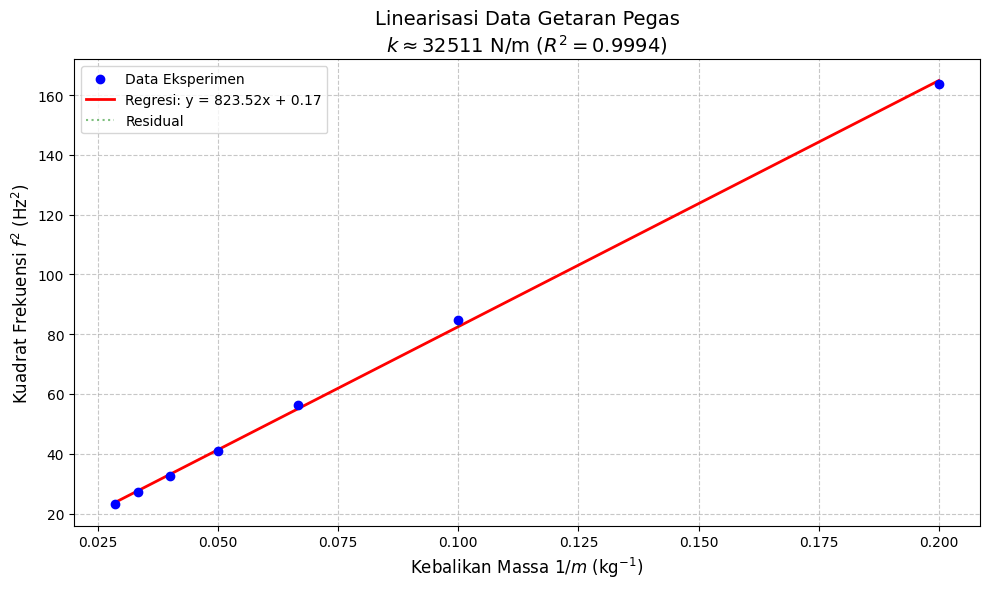

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def buat_grafik_laporan():
    # 1. Input Data
    m = np.array([5, 10, 15, 20, 25, 30, 35])
    f = np.array([12.8, 9.2, 7.5, 6.4, 5.7, 5.2, 4.8])

    # 2. Transformasi Data
    # Model: f^2 = (k / 4pi^2) * (1/m)
    # y = f^2, x = 1/m
    x = 1 / m
    y = f**2

    # 3. Regresi Linear (Komputasi Statistik)
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    
    # Membuat data prediksi untuk garis regresi
    y_pred_line = slope * x + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    r_squared = r_value**2

    # 4. Komputasi Parameter Fisika
    # Slope = k / (4 * pi^2)  =>  k = Slope * 4 * pi^2
    k = slope * 4 * (np.pi**2)

    # 5. Prediksi (Ekstrapolasi) untuk massa baru
    m_new = np.array([40, 50])
    x_new = 1 / m_new
    y_new_pred = slope * x_new + intercept
    f_new_pred = np.sqrt(y_new_pred)

    # Output Hasil Komputasi ke Konsol
    print("-" * 30)
    print("HASIL ANALISIS REGRESI")
    print("-" * 30)
    print(f"Persamaan Regresi : {line_eq}")
    print(f"R-squared (R^2)   : {r_squared:.4f}")
    print(f"Konstanta Pegas k : {k:.2f} N/m")
    print("-" * 30)
    print("PREDIKSI FREKUENSI:")
    for i, massa in enumerate(m_new):
        print(f"Massa {massa} kg -> Frekuensi {f_new_pred[i]:.2f} Hz")
    print("-" * 30)

    # 6. Visualisasi (Plotting)
    plt.figure(figsize=(10, 6))
    
    # Scatter plot data eksperimen
    plt.scatter(x, y, color='blue', label='Data Eksperimen', zorder=5)
    
    # Garis regresi
    plt.plot(x, y_pred_line, color='red', linewidth=2, label=f'Regresi: {line_eq}')
    
    # Error bar (residual)
    plt.vlines(x, y, y_pred_line, color='green', linestyle=':', alpha=0.5, label='Residual')

    # Anotasi Judul & Label
    plt.title(f'Linearisasi Data Getaran Pegas\n$k \\approx {k:.0f}$ N/m ($R^2 = {r_squared:.4f}$)', fontsize=14)
    plt.xlabel('Kebalikan Massa $1/m$ (kg$^{-1}$)', fontsize=12)
    plt.ylabel('Kuadrat Frekuensi $f^2$ (Hz$^2$)', fontsize=12)
    
    # Grid & Legenda
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()

    # Simpan gambar
    filename = 'grafik_regresi_pegas.png'
    plt.savefig(filename)
    print(f"Grafik berhasil disimpan sebagai {filename}")
    plt.show()

if __name__ == "__main__":
    buat_grafik_laporan()